In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_feather("Sales_data.ftr")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [5]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Length: 186850, dtype: bool

In [6]:
df = df.dropna(how="all")
df = df.drop_duplicates()

In [7]:
df[df.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [10]:
df.notnull().sum()

Order ID            185687
Product             185687
Quantity Ordered    185687
Price Each          185687
Order Date          185687
Purchase Address    185687
dtype: int64

In [11]:
df["Quantity Ordered"].unique()

array(['2', '1', '3', '5', 'Quantity Ordered', '4', '7', '6', '8', '9'],
      dtype=object)

In [12]:
df[df["Quantity Ordered"] == 'Quantity Ordered']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [13]:
df.drop(519, inplace=True)

In [14]:
df["Quantity Ordered"].unique()

array(['2', '1', '3', '5', '4', '7', '6', '8', '9'], dtype=object)

In [15]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int')
df['Price Each'] = df['Price Each'].astype('float')

df['Sales'] = df["Quantity Ordered"]*df["Price Each"]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99


In [16]:
df['Month'] = df["Order Date"].apply(lambda x: x.split('/')[0])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,04
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,04


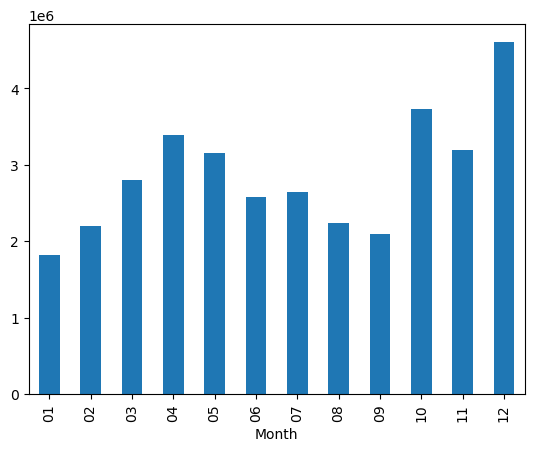

In [17]:
monthly_sales = df.groupby('Month')['Sales'].sum().plot(kind="bar")
monthly_sales

In [18]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,04
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,04


In [19]:
df["City"] = df["Purchase Address"].str.split(',').str[1]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,04,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,04,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,04,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,04,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,04,Los Angeles


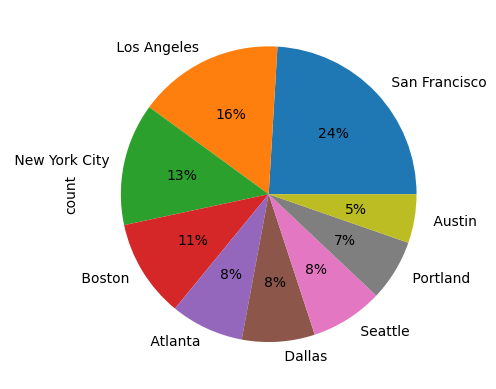

In [20]:
max_ordered_city = df['City'].value_counts().plot(kind="pie", autopct="%1.0f%%")

In [21]:
result = df.groupby("Product").agg({'Quantity Ordered': 'sum', 'Price Each': 'mean'})

result

,Quantity Ordered,Price Each
Product,,
20in Monitor,4126,109.99
27in 4K Gaming Monitor,6239,389.99
27in FHD Monitor,7541,149.99
34in Ultrawide Monitor,6192,379.99
AA Batteries (4-pack),27615,3.84
AAA Batteries (4-pack),30986,2.99
Apple Airpods Headphones,15637,150.00
Bose SoundSport Headphones,13430,99.99
Flatscreen TV,4813,300.00


In [22]:
most_sold_products = df['Product'].value_counts()[0:5].index
most_sold_products

Index(['USB-C Charging Cable', 'Lightning Charging Cable',
       'AAA Batteries (4-pack)', 'AA Batteries (4-pack)', 'Wired Headphones'],
      dtype='object', name='Product')

In [23]:
new_df = df[df["Product"].isin(most_sold_products)]
new_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,04,Dallas
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,04,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,04,Los Angeles
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",11.95,04,San Francisco
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",11.95,04,Atlanta
...,...,...,...,...,...,...,...,...,...
186840,259349,AAA Batteries (4-pack),1,2.99,09/01/19 22:14,"911 River St, Dallas, TX 75001",2.99,09,Dallas
186842,259350,USB-C Charging Cable,1,11.95,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",11.95,09,San Francisco
186844,259352,USB-C Charging Cable,1,11.95,09/07/19 15:49,"976 Forest St, San Francisco, CA 94016",11.95,09,San Francisco
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",8.97,09,Los Angeles


In [24]:
pivot = new_df.groupby(["Month", "Product"]).size().unstack()
pivot

Product,AA Batteries (4-pack),AAA Batteries (4-pack),Lightning Charging Cable,USB-C Charging Cable,Wired Headphones
Month,,,,,
01,1037,1084,1069,1171,1004
02,1274,1320,1393,1511,1179
03,1672,1645,1749,1766,1512
04,2062,1988,2197,2074,1888
05,1821,1888,1929,1879,1729
06,1540,1451,1560,1531,1334
07,1555,1554,1690,1667,1434
08,1357,1340,1354,1339,1191
09,1314,1281,1324,1451,1173


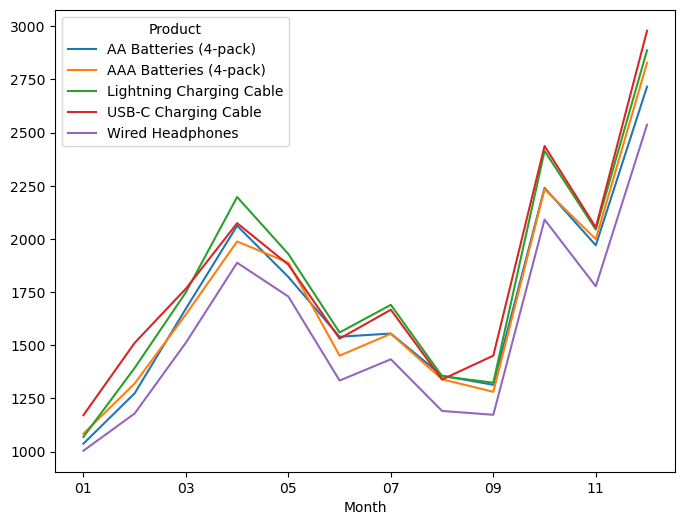

In [25]:
pivot.plot(figsize=(8,6))

In [29]:
df_duplicated = df[df["Order ID"].duplicated(keep=False)]
df_duplicated

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,04,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,04,Los Angeles
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",600.00,04,Los Angeles
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",11.95,04,Los Angeles
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",5.98,04,San Francisco
...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",3.84,09,Atlanta
186803,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",11.99,09,Atlanta
186804,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",5.98,09,Atlanta
186841,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",600.00,09,San Francisco


In [30]:
df123 = df_duplicated.groupby("Order ID")["Product"].apply(lambda x: ", ".join(x)).reset_index().rename(columns={"Product": "grouped_products"})


In [31]:
df123

,Order ID,grouped_products
0,141275,"USB-C Charging Cable, Wired Headphones"
1,141290,"Apple Airpods Headphones, AA Batteries (4-pack)"
2,141365,"Vareebadd Phone, Wired Headphones"
3,141384,"Google Phone, USB-C Charging Cable"
4,141450,"Google Phone, Bose SoundSport Headphones"
...,...,...
6874,319536,"Macbook Pro Laptop, Wired Headphones"
6875,319556,"Google Phone, Wired Headphones"
6876,319584,"iPhone, Wired Headphones"
6877,319596,"iPhone, Lightning Charging Cable"


In [32]:
merged_df = df_duplicated.merge(df123, how="left", on="Order ID")
merged_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,grouped_products
0,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,04,Los Angeles,"Google Phone, Wired Headphones"
1,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,04,Los Angeles,"Google Phone, Wired Headphones"
2,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",600.00,04,Los Angeles,"Google Phone, USB-C Charging Cable"
3,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",11.95,04,Los Angeles,"Google Phone, USB-C Charging Cable"
4,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",5.98,04,San Francisco,"AAA Batteries (4-pack), Google Phone"
...,...,...,...,...,...,...,...,...,...,...
14123,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",3.84,09,Atlanta,"34in Ultrawide Monitor, AA Batteries (4-pack)"
14124,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",11.99,09,Atlanta,"Wired Headphones, AAA Batteries (4-pack)"
14125,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",5.98,09,Atlanta,"Wired Headphones, AAA Batteries (4-pack)"
14126,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",600.00,09,San Francisco,"Google Phone, USB-C Charging Cable"


In [35]:
merged_df_no_duplicates = merged_df.drop_duplicates(subset=['Order ID'])
merged_df_no_duplicates

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,grouped_products
0,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,04,Los Angeles,"Google Phone, Wired Headphones"
2,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",600.00,04,Los Angeles,"Google Phone, USB-C Charging Cable"
4,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",5.98,04,San Francisco,"AAA Batteries (4-pack), Google Phone"
6,176672,Lightning Charging Cable,1,14.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",14.95,04,New York City,"Lightning Charging Cable, USB-C Charging Cable"
8,176681,Apple Airpods Headphones,1,150.00,04/20/19 10:39,"331 Cherry St, Seattle, WA 98101",150.00,04,Seattle,"Apple Airpods Headphones, ThinkPad Laptop"
...,...,...,...,...,...,...,...,...,...,...
14118,259277,iPhone,1,700.00,09/28/19 13:07,"795 Willow St, New York City, NY 10001",700.00,09,New York City,"iPhone, Wired Headphones"
14120,259297,iPhone,1,700.00,09/15/19 18:54,"138 Main St, Boston, MA 02215",700.00,09,Boston,"iPhone, Lightning Charging Cable"
14122,259303,34in Ultrawide Monitor,1,379.99,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",379.99,09,Atlanta,"34in Ultrawide Monitor, AA Batteries (4-pack)"
14124,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",11.99,09,Atlanta,"Wired Headphones, AAA Batteries (4-pack)"


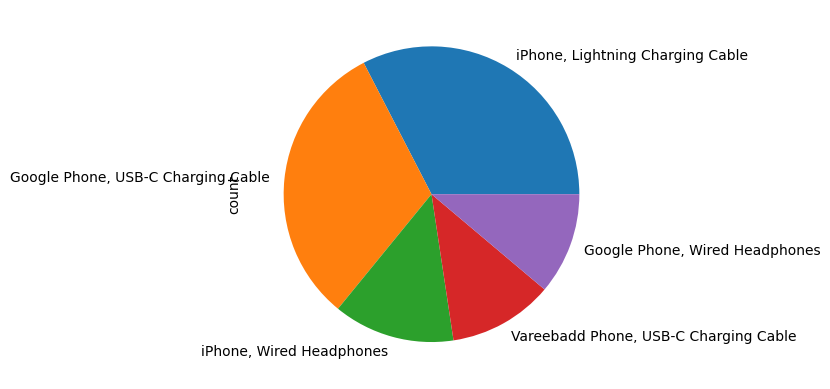

In [36]:
merged_df_no_duplicates["grouped_products"].value_counts()[0:5].plot(kind="pie")